Boxplot Normal Distribution Notebook: https://github.com/mGalarnyk/Python_Tutorials/blob/master/Statistics/boxplot/box_plot.ipynb

# Boxplot Interpretation

Data taken from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/version/2

In [1]:
# Import all libraries for the rest of the blog post
from scipy.integrate import quad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mGalarnyk/Python_Tutorials/master/Kaggle/BreastCancerWisconsin/data/data.csv')

In [3]:
df.head(1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN


## Exploratory Data Analysis

In [4]:
# Looking at the Distribution of the Dataset in terms of Diagnosis
df['diagnosis'].value_counts(dropna = False)

B    357
M    212
Name: diagnosis, dtype: int64

The section below is so that we can compare test performance with null accuracy

In [5]:
length = len(df)

# Number of malignant cases
malignant = len(df[df['diagnosis']=='M'])

#Rate of malignant tumors over all cases
rate = (float(malignant)/(length))*100

print('The malignant percentage is: {}%'.format(rate))
print('The benign percentage is: {}%'.format(100 - rate))

The malignant percentage is: 37.2583479789%
The benign percentage is: 62.7416520211%


It is also possible to create a scatter matrix with the features. The red dots correspond to malignant diagnosis and blue to benign. Look how in some cases reds and blues dots occupies different regions of the plots. <b>This might not be useful with so many features</b>

## Look at Boxplot

In [6]:
features = set(df.columns)
features.remove('diagnosis')

### Seaborn

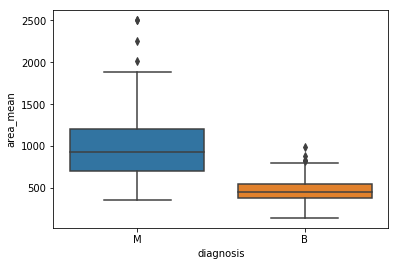

In [7]:
sns.boxplot(x='diagnosis', y='area_mean', data=df)
plt.savefig('seaborn_basic_area_mean_diagnosis.png')

## Matplotlib

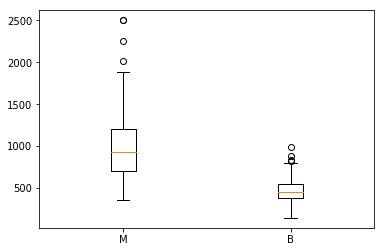

In [9]:
malignant = df[df['diagnosis']=='M']['area_mean']
benign = df[df['diagnosis']=='B']['area_mean']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([malignant,benign], labels=['M', 'B'])

plt.savefig('matplotlib_basic_area_mean_diagnosis.png');

### Pandas

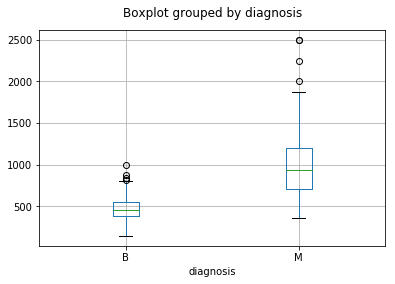

In [10]:
df.boxplot(column = 'area_mean', by = 'diagnosis');
plt.title('')
plt.savefig('pandas_basic_area_mean_diagnosis.png')

## Nicer Seaborn

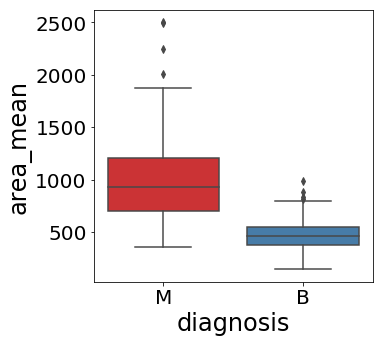

In [11]:
plt.figure(figsize=(5,5))

sns.boxplot(x='diagnosis', y='area_mean', data=df, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('diagnosis', fontsize = 24)
plt.ylabel('area_mean', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.savefig('area_mean_diagnosis.png')

## Notched Boxplot

In [11]:
malignant = df[df['diagnosis']=='M']['area_mean']
benign = df[df['diagnosis']=='B']['area_mean']

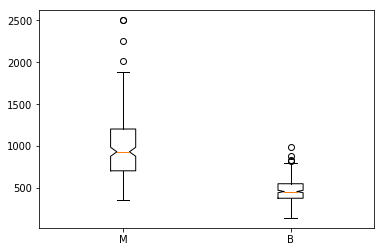

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([malignant,benign], notch = True, labels=['M', 'B']);

## Nicer Notched Boxplot 

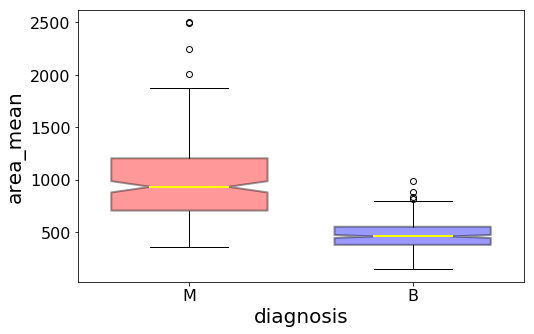

In [20]:
malignant = df[df['diagnosis']=='M']['area_mean']
benign = df[df['diagnosis']=='B']['area_mean']

fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
boxplots = ax.boxplot([malignant,benign],
           notch = True,
           labels=['M', 'B'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')

plt.xlabel('diagnosis', fontsize = 20);
plt.ylabel('area_mean', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

plt.savefig('nicer_notchedBoxplot_basic_area_mean_diagnosis.png')

## Stackoverflow

Get data out of boxplot: https://stackoverflow.com/questions/23349626/getting-data-of-a-box-plot-matplotlib?noredirect=1&lq=1